In [1]:
cd FIFA-DATAFACTOR

[Errno 2] No such file or directory: 'FIFA-DATAFACTOR'
/home/ec2-user/SageMaker/FIFA-DATAFACTOR


In [2]:
pwd

'/home/ec2-user/SageMaker/FIFA-DATAFACTOR'

In [3]:
ls

FIFA_dataprocessing.ipynb  fifa-train.csv  Untitled.ipynb
fifa-test.csv              README.md       variables.pkl


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/seaborn/_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 1.22.4)
  from scipy.stats import gaussian_kde


In [5]:
# Load the training and test datasets
train_df = pd.read_csv('fifa-train.csv')
test_df = pd.read_csv('fifa-test.csv')

# Display the first few rows of the training dataset
train_df.head()

,uid,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,12414,T. Lee,31,https://cdn.sofifa.org/48/18/players/169604.png,England,https://cdn.sofifa.org/flags/14.png,63,63,Chesterfield,https://cdn.sofifa.org/24/18/teams/1924.png,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13780,A. BjÃ¶rkebaum,29,https://cdn.sofifa.org/48/18/players/237353.png,Sweden,https://cdn.sofifa.org/flags/46.png,61,61,IK Sirius,https://cdn.sofifa.org/24/18/teams/113458.png,...,40.0,42.0,54.0,45.0,57.0,54.0,60.0,55.0,42.0,60.0
2,6790,M. Valoti,23,https://cdn.sofifa.org/48/18/players/205089.png,Italy,https://cdn.sofifa.org/flags/27.png,68,72,Hellas Verona,https://cdn.sofifa.org/24/18/teams/206.png,...,54.0,42.0,67.0,54.0,68.0,71.0,62.0,70.0,58.0,62.0
3,4789,T. HysÃ©n,35,https://cdn.sofifa.org/48/18/players/45548.png,Sweden,https://cdn.sofifa.org/flags/46.png,71,71,IFK GÃ¶teborg,https://cdn.sofifa.org/24/18/teams/319.png,...,50.0,46.0,60.0,49.0,69.0,67.0,70.0,68.0,52.0,70.0
4,7061,L. Agouazi,33,https://cdn.sofifa.org/48/18/players/177762.png,Algeria,https://cdn.sofifa.org/flags/97.png,68,68,Chamois Niortais FC,https://cdn.sofifa.org/24/18/teams/1813.png,...,64.0,66.0,65.0,67.0,60.0,62.0,59.0,59.0,64.0,59.0


In [6]:
# Check for missing values in the training dataset
missing_values = train_df.isnull().sum()
missing_values[missing_values > 0]

Club     198
CAM     1601
CB      1601
CDM     1601
CF      1601
CM      1601
LAM     1601
LB      1601
LCB     1601
LCM     1601
LDM     1601
LF      1601
LM      1601
LS      1601
LW      1601
LWB     1601
RAM     1601
RB      1601
RCB     1601
RCM     1601
RDM     1601
RF      1601
RM      1601
RS      1601
RW      1601
RWB     1601
ST      1601
dtype: int64

In [7]:
# Get basic statistics of the training dataset
train_df.describe()

,uid,Age,Overall,Potential,Special,CAM,CB,CDM,CF,CM,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000,12783.000000,12783.000000,12783.000000,12783.00000,12783.000000,...,12783.000000,12783.000000,12783.000000,12783.000000,12783.00000,12783.000000,12783.000000,12783.000000,12783.000000,12783.000000
mean,8996.413028,25.134107,66.238737,71.175403,1594.803323,59.291090,55.422905,56.775874,59.08081,58.508097,...,56.885082,55.422905,58.508097,56.775874,59.08081,60.085348,58.261050,59.398029,57.617852,58.261050
std,5201.010109,4.604970,6.995247,6.120567,271.673694,9.867428,12.230438,10.350616,9.91258,8.889334,...,9.835099,12.230438,8.889334,10.350616,9.91258,9.345654,9.157832,9.970920,9.182780,9.157832
min,1.000000,16.000000,46.000000,46.000000,728.000000,27.000000,25.000000,28.000000,27.00000,30.000000,...,30.000000,25.000000,30.000000,28.000000,27.00000,28.000000,31.000000,26.000000,32.000000,31.000000
25%,4496.750000,21.000000,62.000000,67.000000,1451.000000,53.000000,45.000000,49.000000,53.00000,53.000000,...,49.500000,45.000000,53.000000,49.000000,53.00000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,8980.500000,25.000000,66.000000,71.000000,1633.000000,60.000000,57.000000,57.000000,60.00000,59.000000,...,58.000000,57.000000,59.000000,57.000000,60.00000,61.000000,59.000000,61.000000,58.000000,59.000000
75%,13539.250000,28.000000,71.000000,75.000000,1786.000000,66.000000,65.000000,65.000000,66.00000,65.000000,...,64.000000,65.000000,65.000000,65.000000,66.00000,67.000000,65.000000,66.000000,64.000000,65.000000
max,17980.000000,44.000000,93.000000,94.000000,2278.000000,92.000000,87.000000,85.000000,92.00000,85.000000,...,84.000000,87.000000,85.000000,85.000000,92.00000,90.000000,88.000000,91.000000,84.000000,88.000000


In [8]:
# Fill missing values with the mean for numeric columns only
numeric_cols = train_df.select_dtypes(include=[np.number]).columns
train_df[numeric_cols] = train_df[numeric_cols].fillna(train_df[numeric_cols].mean())

In [9]:
# Drop unnecessary columns
columns_to_drop = ['Photo', 'Flag', 'Club Logo']
train_df.drop(columns=columns_to_drop, inplace=True)

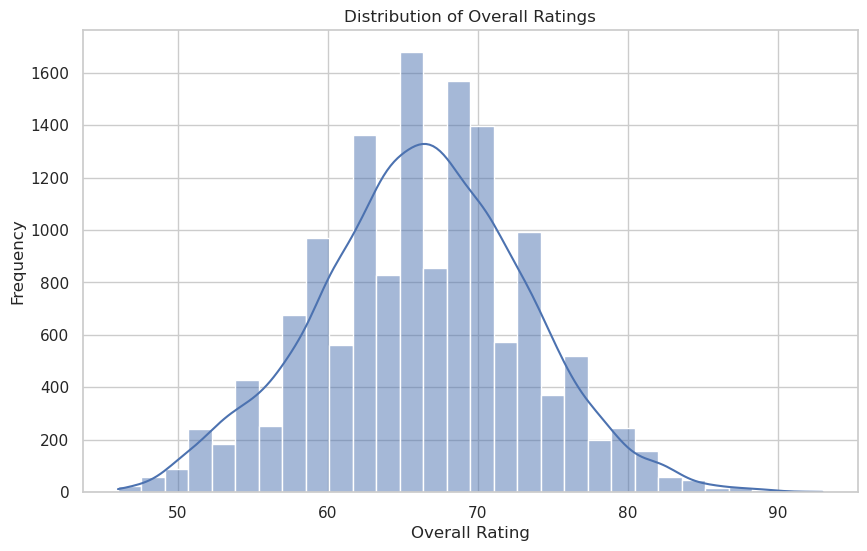

In [10]:
# Visualize the distribution of overall ratings
plt.figure(figsize=(10, 6))
sns.histplot(train_df['Overall'], bins=30, kde=True)
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()

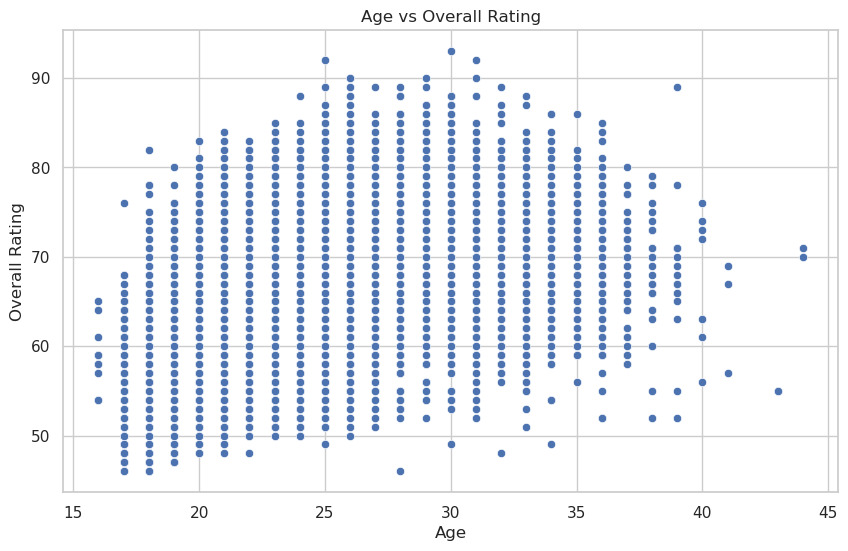

In [11]:
# Visualize the relationship between age and overall rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Overall', data=train_df)
plt.title('Age vs Overall Rating')
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.show()

In [12]:
# Create a new feature for experience level
train_df['Experience_Level'] = np.where(train_df['Age'] > 30, 'Veteran', 'Young')

In [13]:
# One-hot encode categorical variables
train_df = pd.get_dummies(train_df, columns=['Nationality', 'Club', 'Experience_Level'], drop_first=True)

In [14]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = train_df.drop(columns=['Overall', 'Name', 'uid'])
y = train_df['Overall']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Identify non-numeric columns
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns
print(non_numeric_cols)

Index(['Value', 'Wage', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve',
       ...
       'Club_Yeovil Town', 'Club_Yokohama F. Marinos', 'Club_ZagÅ‚Ä™bie Lubin',
       'Club_Zenit St. Petersburg', 'Club_Ãguilas Doradas', 'Club_Ã–rebro SK',
       'Club_Ã–stersunds FK', 'Club_Ä°stanbul BaÅŸakÅŸehir FK',
       'Club_ÅšlÄ…sk WrocÅ‚aw', 'Experience_Level_Young'],
      dtype='object', length=842)


In [16]:
# Drop non-numeric columns
X = X.drop(columns=non_numeric_cols)

In [17]:
from sklearn.model_selection import train_test_split

# Define features and target variable
y = train_df['Overall']

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the validation set
y_pred = model.predict(X_val)

# Calculate the mean squared error
mse = mean_squared_error(y_val, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 5.045302713408592


In [19]:
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(y_val, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.8983437369044461


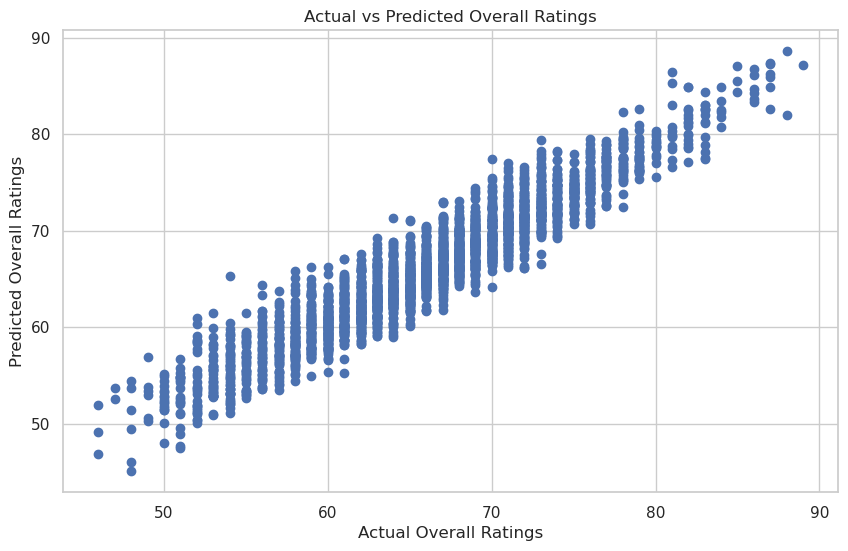

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_val, y_pred)
plt.xlabel('Actual Overall Ratings')
plt.ylabel('Predicted Overall Ratings')
plt.title('Actual vs Predicted Overall Ratings')
plt.show()

In [21]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_rf = rf_model.predict(X_val)

# Calculate the mean squared error
mse_rf = mean_squared_error(y_val, y_pred_rf)
print(f'Random Forest Mean Squared Error: {mse_rf}')

# Calculate R-squared
r2_rf = r2_score(y_val, y_pred_rf)
print(f'Random Forest R-squared: {r2_rf}')

Random Forest Mean Squared Error: 0.7996008263353424
Random Forest R-squared: 0.9838890872182271


In [22]:
# Define a smaller parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}